In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#relevant ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#ML models
from xgboost import XGBClassifier

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
# read in csv file as a DataFrame
df = pd.read_csv(r"C:\Users\Harshit\Downloads\Loan Prediction_Training Data.txt")
df.to_csv(r'C:\Users\Harshit\Downloads\Loan Prediction_Training Data.csv', index = None)

In [3]:
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [4]:
# Setting Id as index 
df.set_index('Id', inplace=True)
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [5]:
# Lets look at the shape of data
df.shape

(252000, 12)

In [6]:
# lets see the features information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB


In [7]:
# summary of data
df.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [8]:
# checking missing values
df.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [9]:
# Categorical features:
cat_cols= df[['Married/Single', 'House_Ownership','Car_Ownership' ,'Profession', 'CITY', 'STATE']]

# numericasl features
num_cols= df[['Income', 'Experience','Age','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']]

Text(0.5, 1.0, 'Count of Risk_flag')

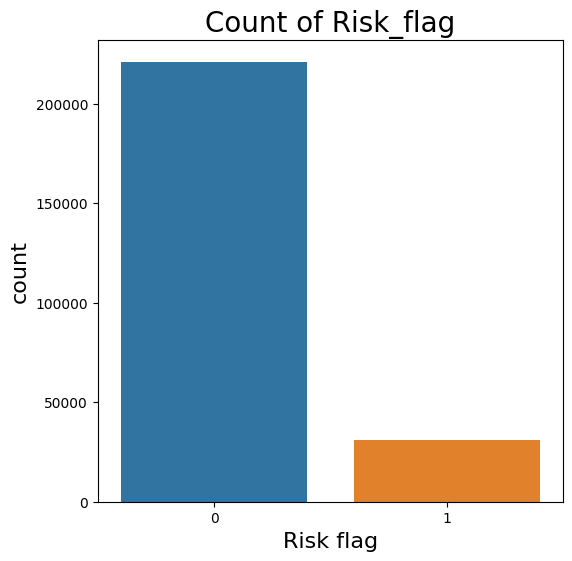

In [10]:
# lets visualize the Target variables first,
plt.figure(figsize=(6,6))
sns.countplot(x=df["Risk_Flag"])
plt.xlabel('Risk flag',fontsize=16)
plt.ylabel('count',fontsize=16)
plt.title("Count of Risk_flag", fontsize=20)

In [11]:
df['Risk_Flag'].value_counts()

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64

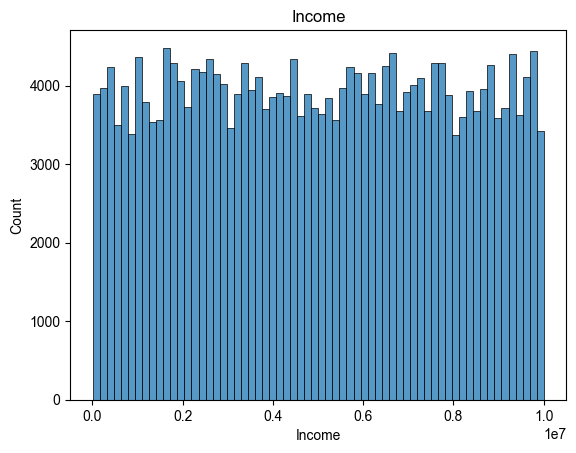

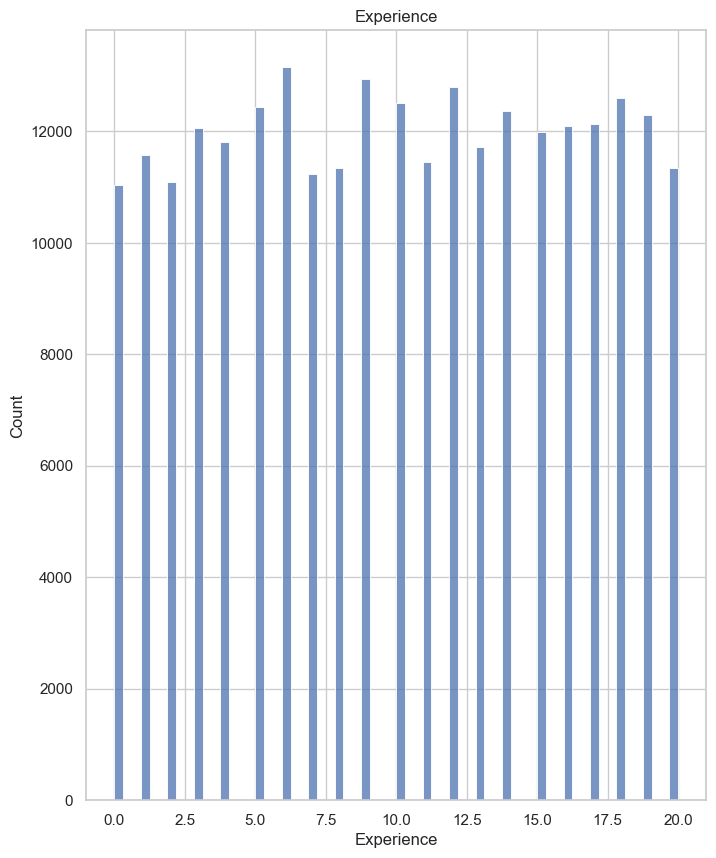

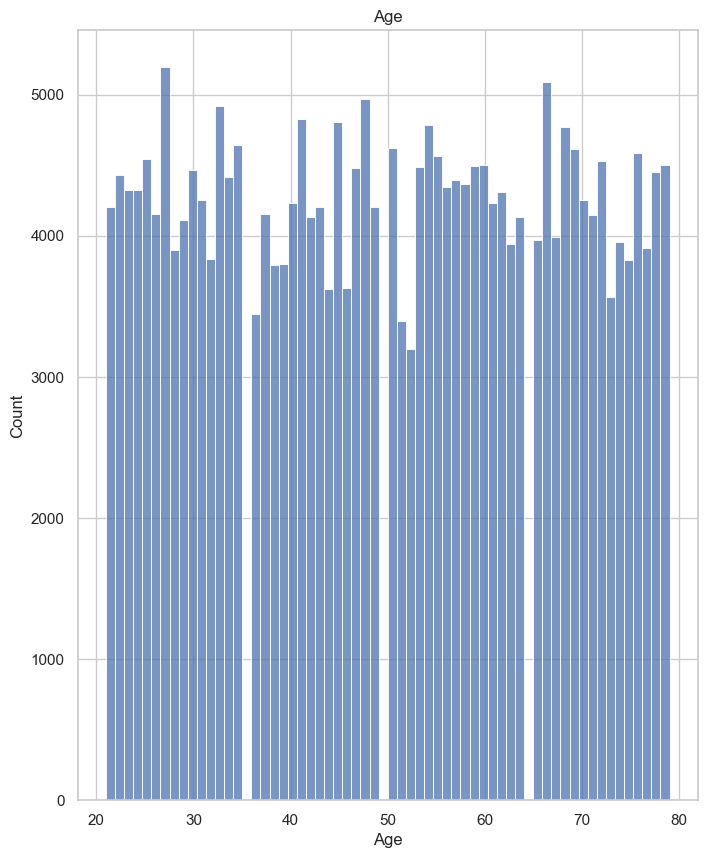

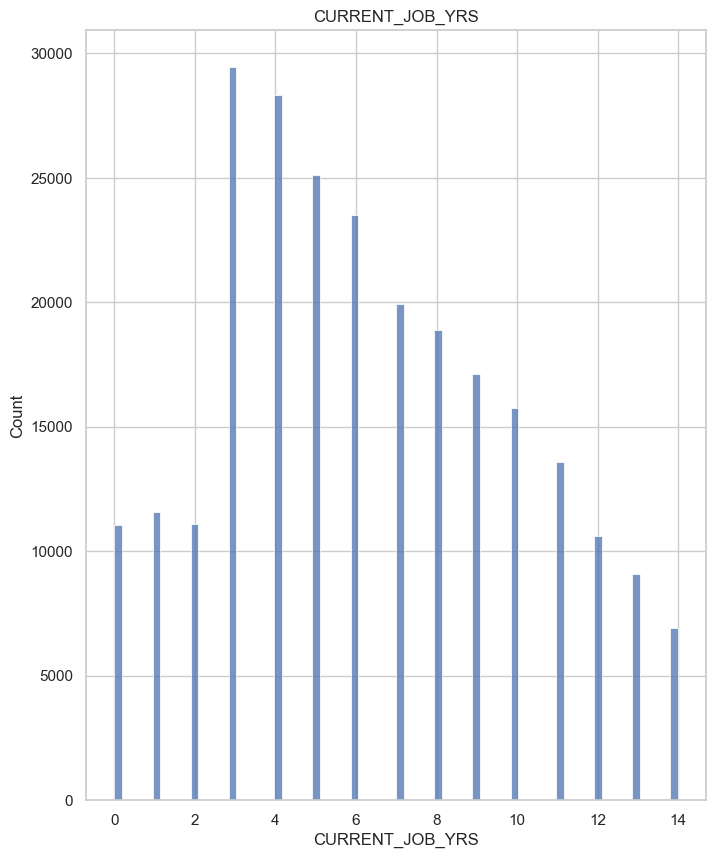

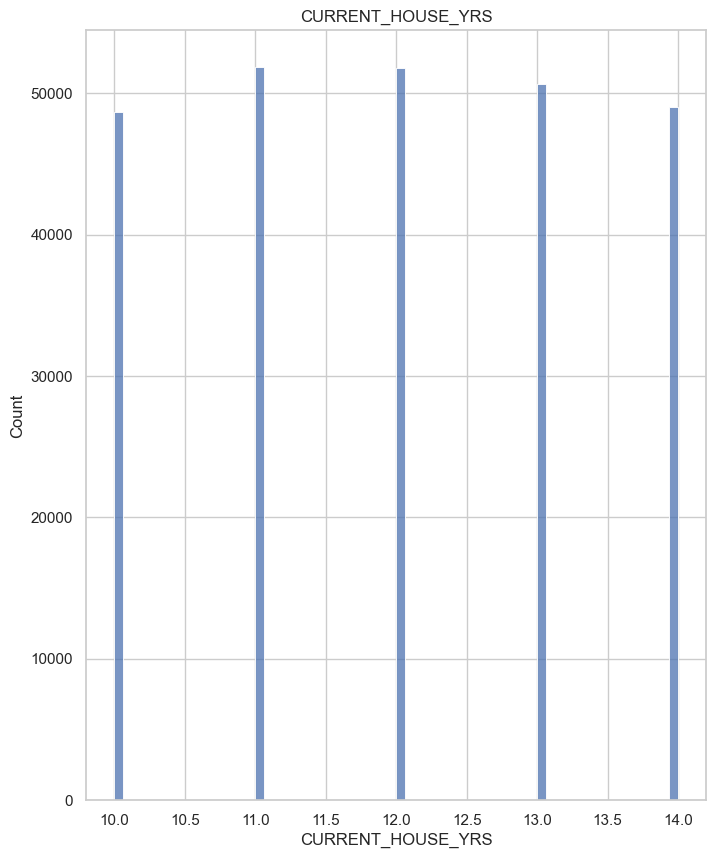

<Figure size 800x1000 with 0 Axes>

In [12]:
#Let's plot our Numeric data:
for i in num_cols:
    sns.histplot(num_cols[i])
    plt.title(i)
    plt.figure(figsize=(8,10))
    sns.set(style="whitegrid")

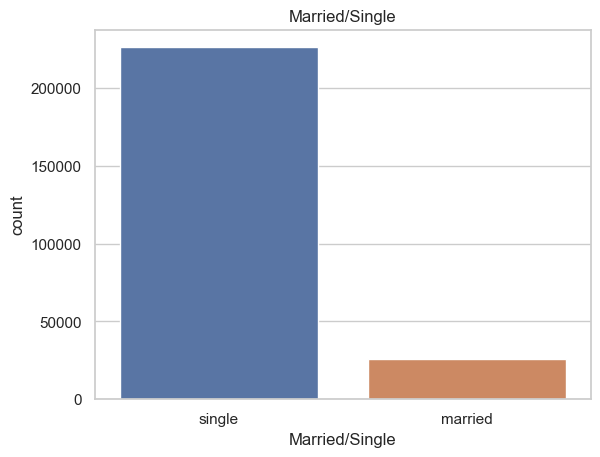

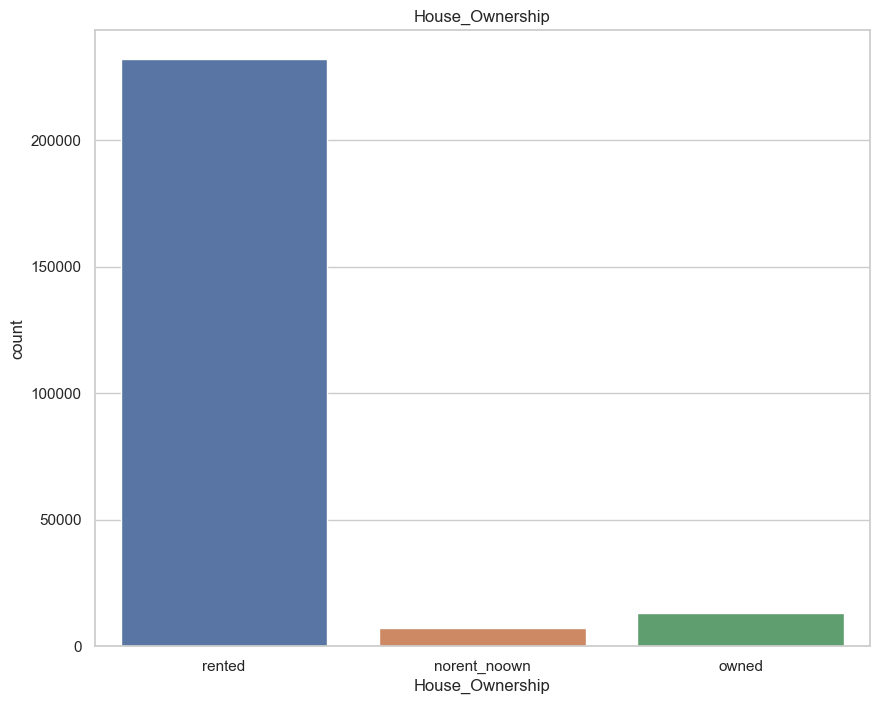

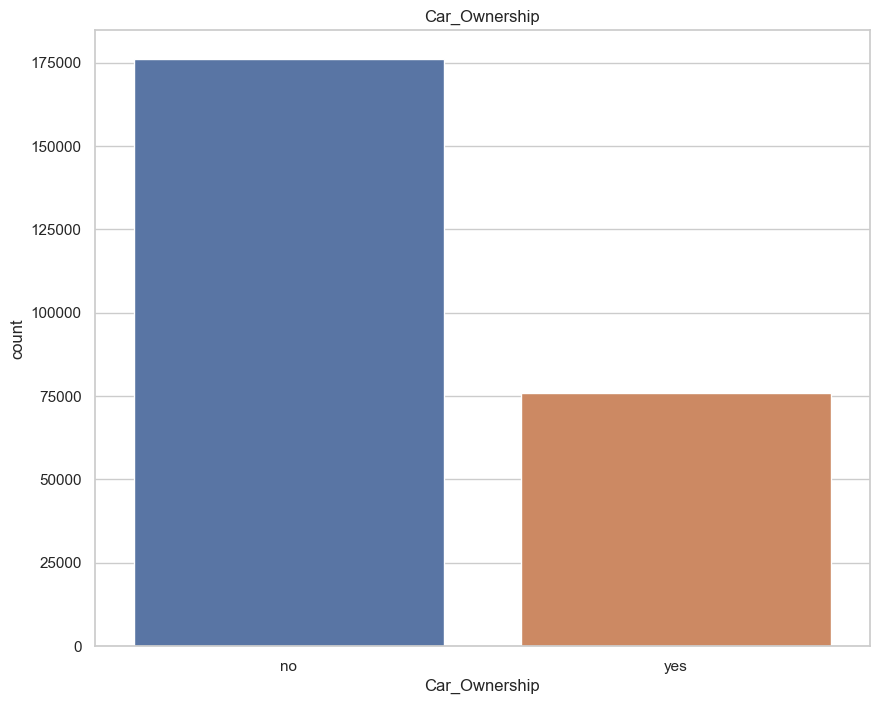

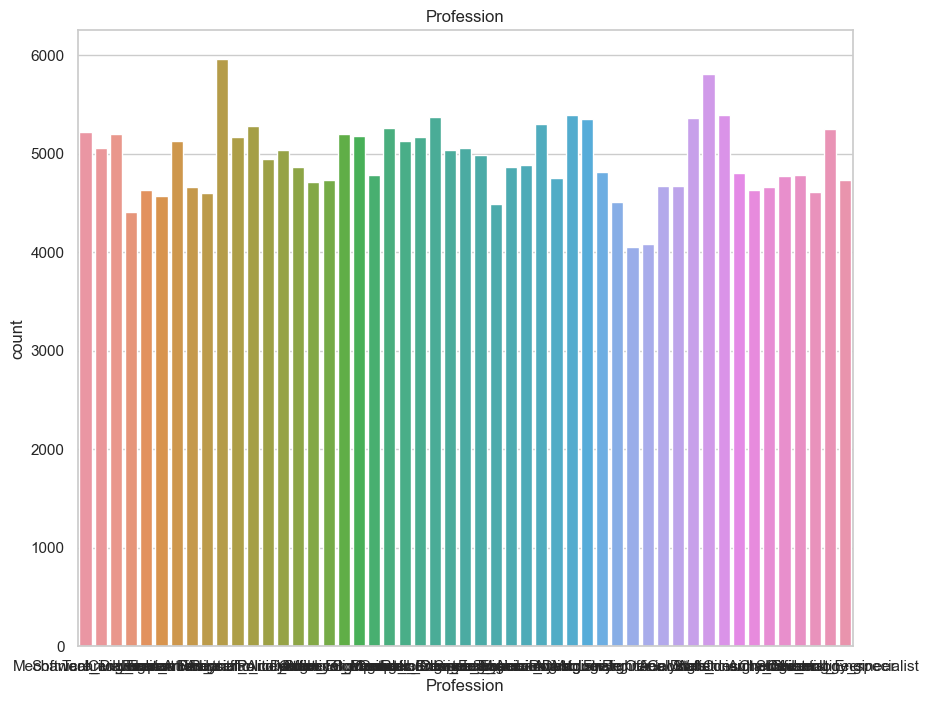

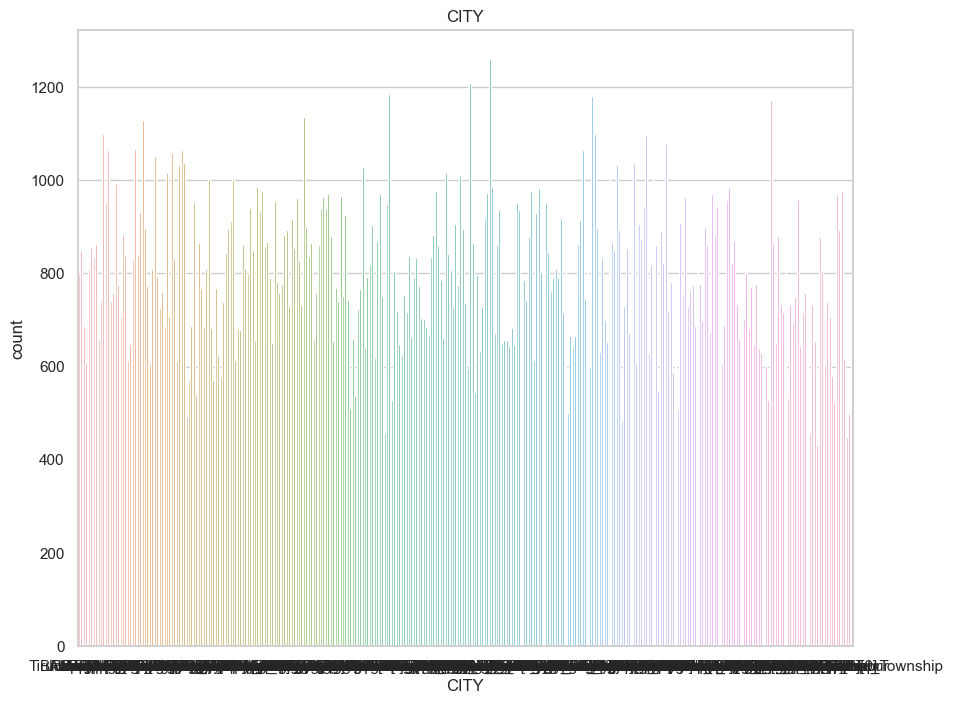

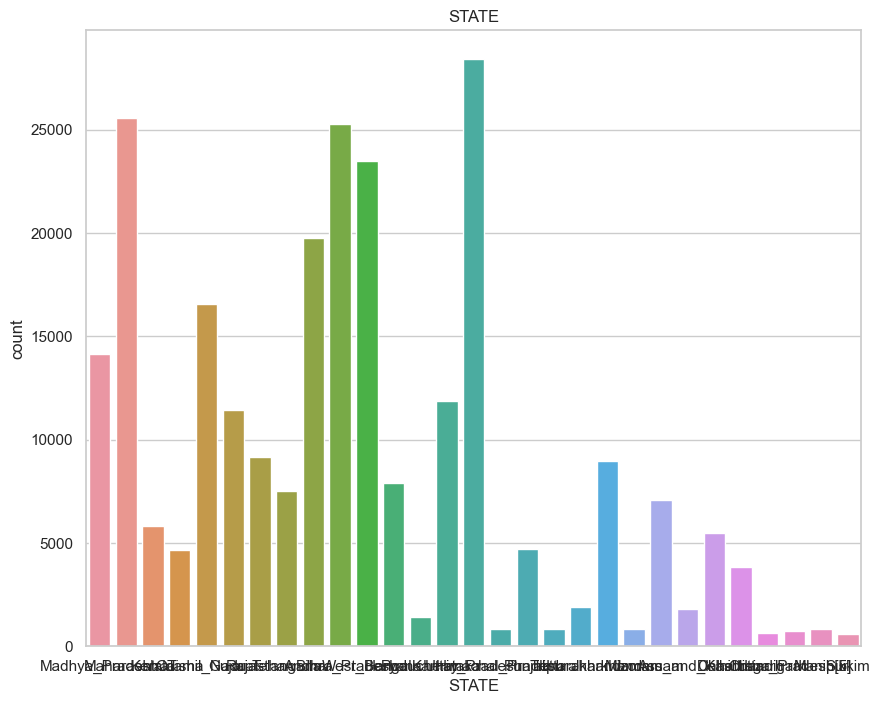

<Figure size 1000x800 with 0 Axes>

In [13]:
#Let's plot our categorical data:
for i in cat_cols:
    sns.countplot(x=cat_cols[i])
    plt.title(i)
    sns.set(style="whitegrid")
    plt.figure(figsize=(10,8))

Text(0, 0.5, 'count')

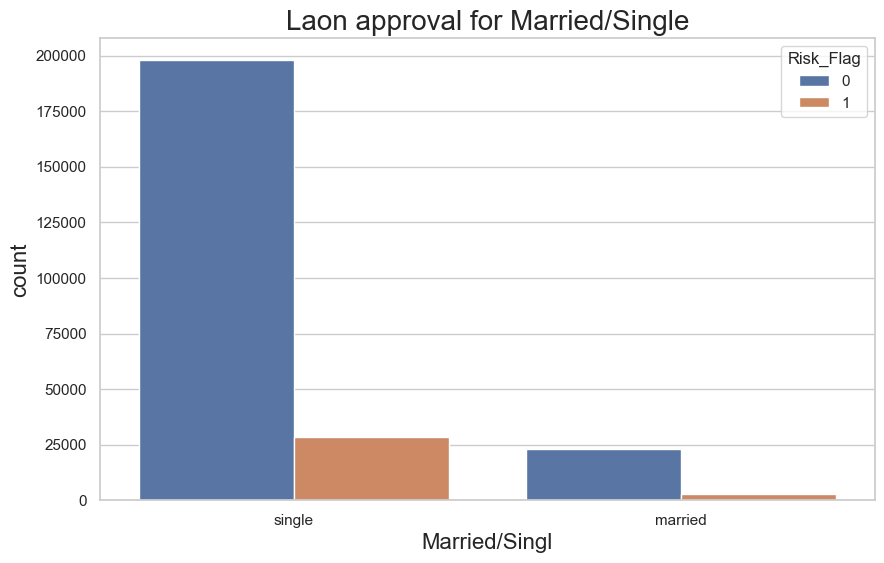

In [14]:
# Single/Married vs Risk_Flag
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.countplot(x='Married/Single',hue='Risk_Flag',data=df)
plt.title('Laon approval for Married/Single', fontsize=20)
plt.xlabel('Married/Singl',fontsize=16)
plt.ylabel("count",fontsize=16)

Text(0, 0.5, 'count')

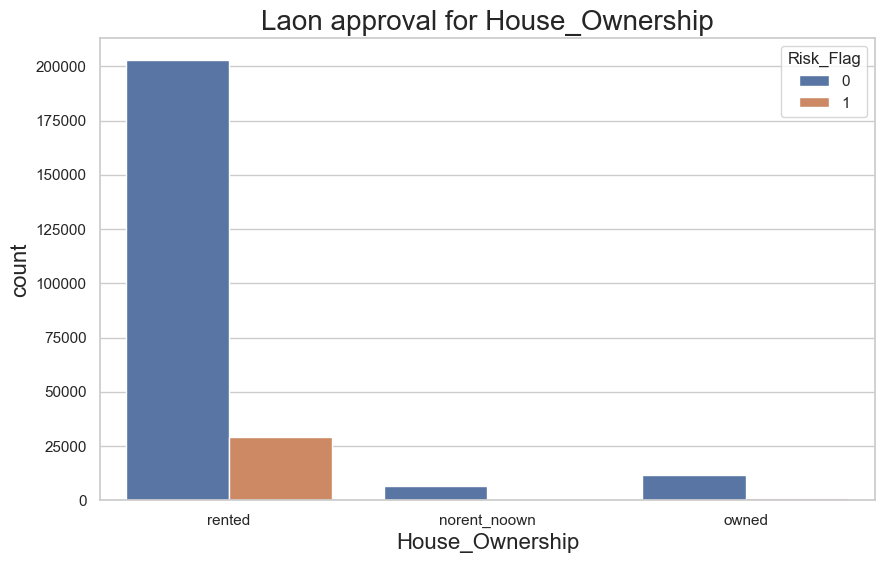

In [15]:
# House_Ownership vs Risk_Flag
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.countplot(x='House_Ownership',hue="Risk_Flag",data=df)
plt.title('Laon approval for House_Ownership', fontsize=20)
plt.xlabel('House_Ownership',fontsize=16)
plt.ylabel("count",fontsize=16)

Text(0, 0.5, 'count')

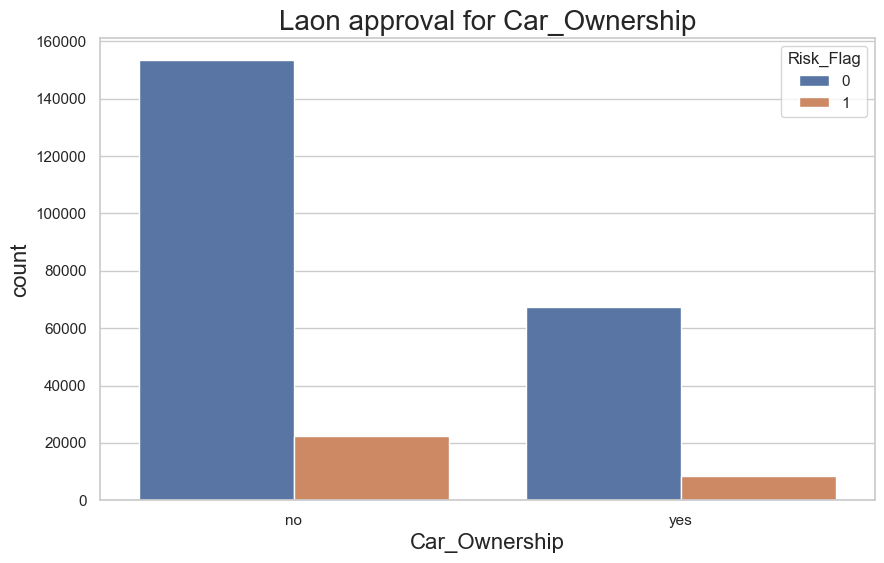

In [16]:
# Car_Ownership vs Risk_Flag
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.countplot(x='Car_Ownership',hue='Risk_Flag',data=df)
plt.title('Laon approval for Car_Ownership', fontsize=20)
plt.xlabel('Car_Ownership',fontsize=16)
plt.ylabel("count",fontsize=16)

Text(0, 0.5, 'count')

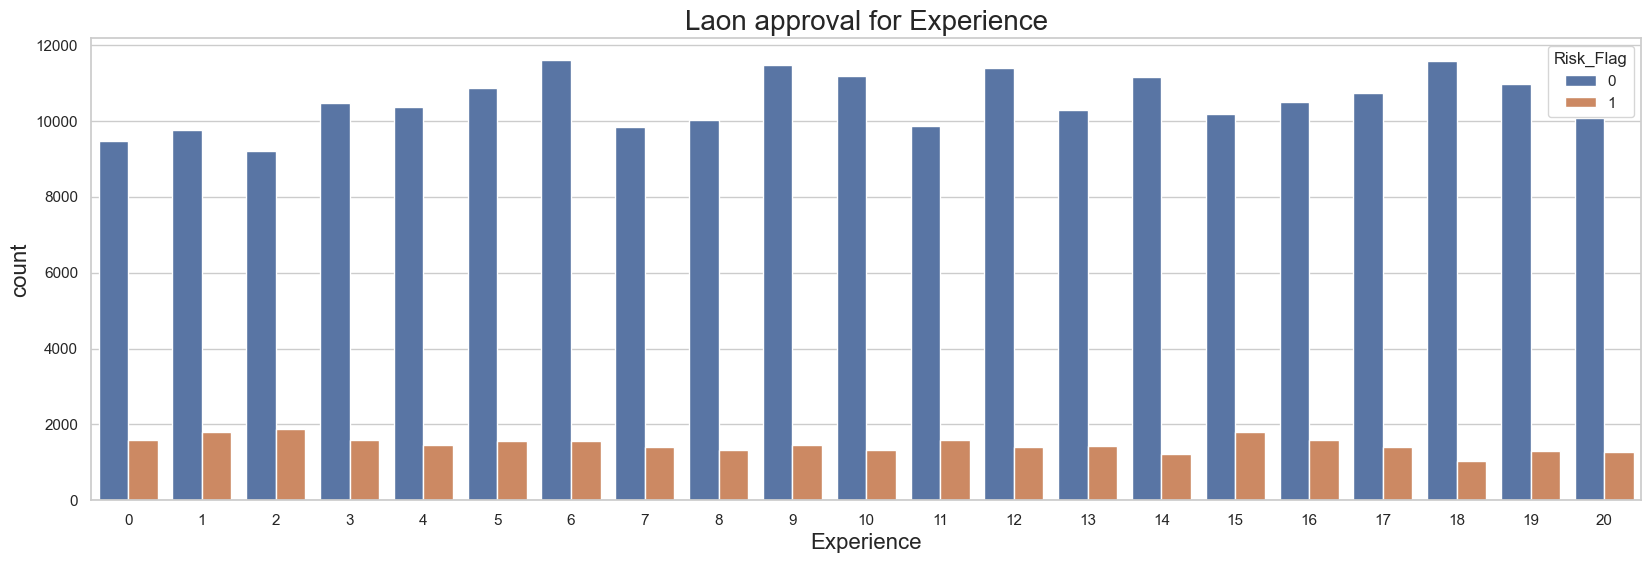

In [17]:
# Experience vs Risk_Flag
sns.set(style="whitegrid")
plt.figure(figsize=(20,6))
sns.countplot(x='Experience',hue='Risk_Flag',data=df)
plt.title('Laon approval for Experience', fontsize=20)
plt.xlabel('Experience',fontsize=16)
plt.ylabel("count",fontsize=16)

Text(0, 0.5, 'count')

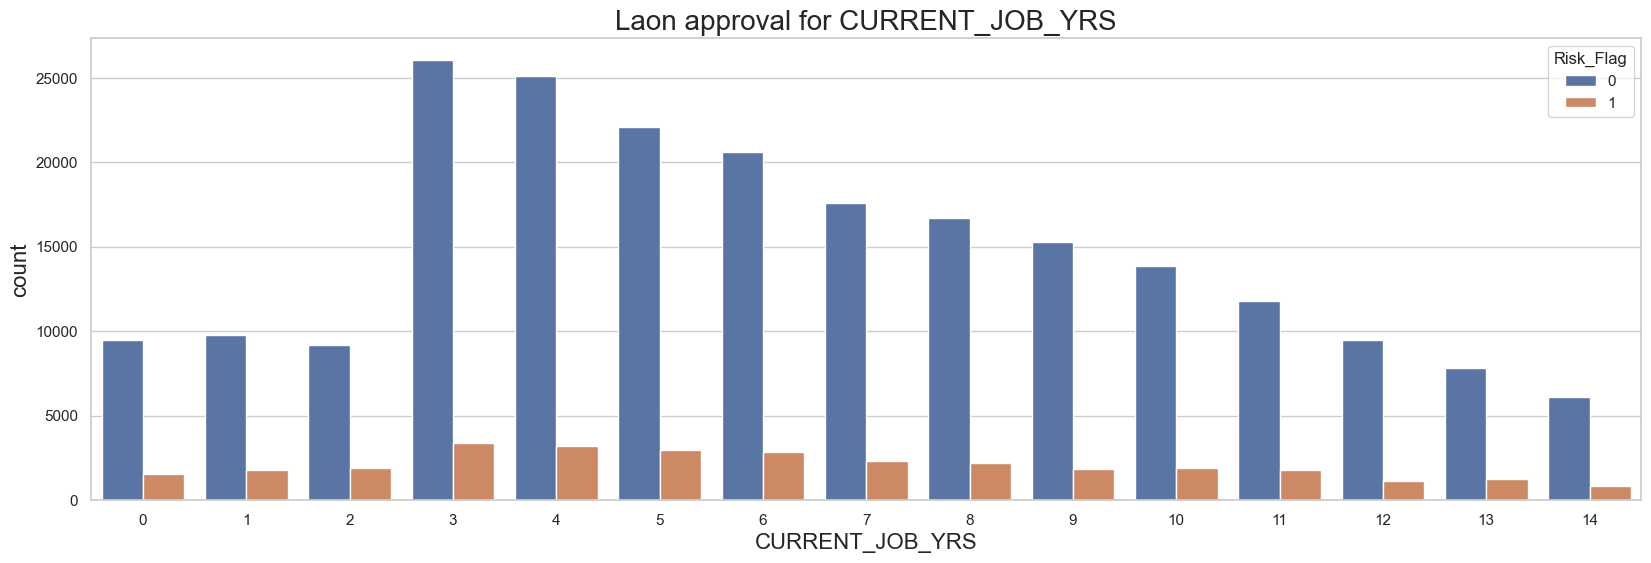

In [18]:
# CURRENT_JOB_YRS vs Risk_Flag
sns.set(style="whitegrid")
plt.figure(figsize=(20,6))
sns.countplot(x='CURRENT_JOB_YRS',hue='Risk_Flag',data=df)
plt.title('Laon approval for CURRENT_JOB_YRS', fontsize=20)
plt.xlabel('CURRENT_JOB_YRS',fontsize=16)
plt.ylabel("count",fontsize=16)

Text(0, 0.5, 'count')

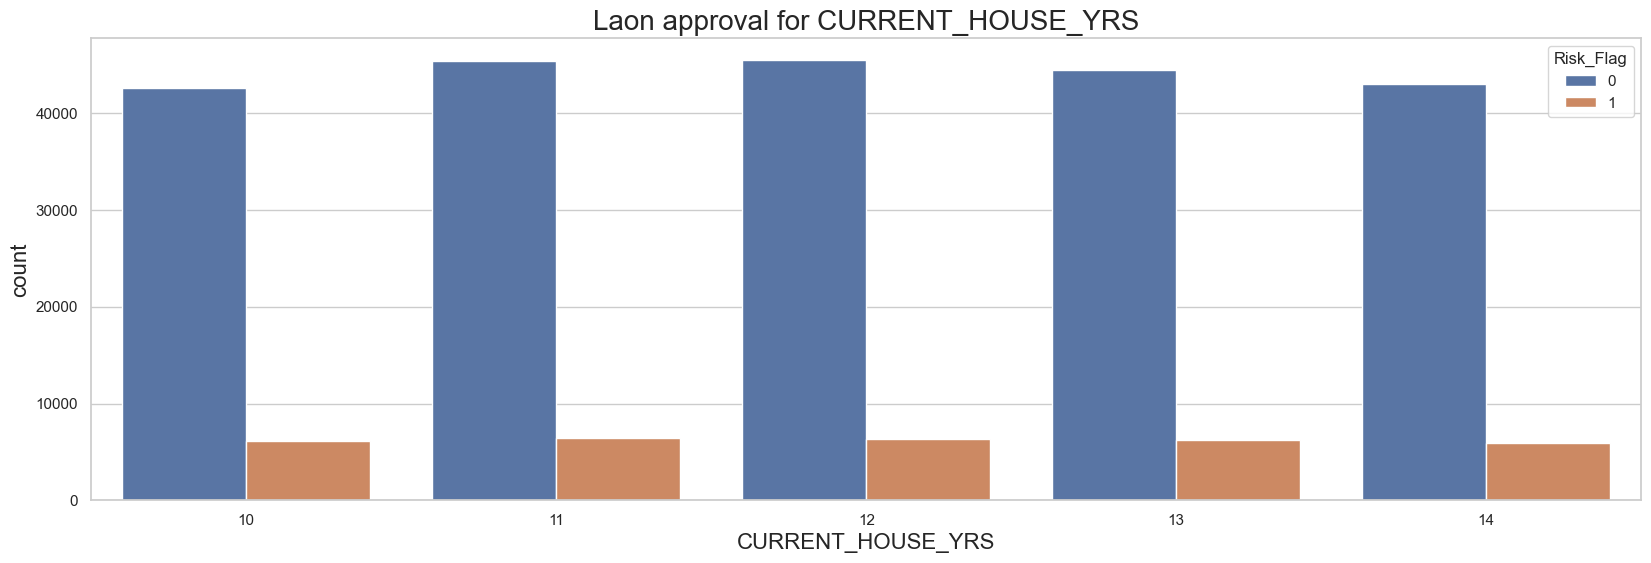

In [19]:
# CURRENT_HOUSE_YRS vs Risk_Flag
sns.set(style="whitegrid")
plt.figure(figsize=(20,6))
sns.countplot(x='CURRENT_HOUSE_YRS',hue='Risk_Flag',data=df)
plt.title('Laon approval for CURRENT_HOUSE_YRS', fontsize=20)
plt.xlabel('CURRENT_HOUSE_YRS',fontsize=16)
plt.ylabel("count",fontsize=16)


In [56]:
df.dtypes

Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

In [21]:
# Independet variables 
X= df.iloc[:,:-1]

# Dependent variables 
y= df.iloc[:,-1]

In [22]:
# Dropping columns city and state from independet variables
X.drop(['CITY','STATE'],inplace=True,axis=1)
# Now lets verify it by using head 
X.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
Id,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,3,13
2,7574516,40,10,single,rented,no,Software_Developer,9,13
3,3991815,66,4,married,rented,no,Technical_writer,4,10
4,6256451,41,2,single,rented,yes,Software_Developer,2,12
5,5768871,47,11,single,rented,no,Civil_servant,3,14


In [23]:
# COnverting to dummies variables 
X= pd.get_dummies(X, columns=['Married/Single','House_Ownership','Car_Ownership','Profession'],drop_first=True)
# Now lets verfy it.
X.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,Profession_Analyst,...,Profession_Scientist,Profession_Secretary,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical_writer,Profession_Technician,Profession_Technology_specialist,Profession_Web_designer
Id,,,,,,,,,,,,,,,,,,,,,
1,1303834,23,3,3,13,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7574516,40,10,9,13,True,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
3,3991815,66,4,4,10,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,6256451,41,2,2,12,True,False,True,True,False,...,False,False,True,False,False,False,False,False,False,False
5,5768871,47,11,3,14,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
# Splitting the training and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [25]:
# Training the model

XGB = XGBClassifier(use_label_encoder=False)
XGB.fit(X_train, y_train)

# Predicting the model
y_predict = XGB.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
XGB_SC = accuracy_score(y_predict,y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")

C:\Users\Harshit\anaconda3\envs\tensorflow_new\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


              precision    recall  f1-score   support

           0       0.89      0.99      0.94     66329
           1       0.65      0.14      0.23      9271

    accuracy                           0.89     75600
   macro avg       0.77      0.56      0.58     75600
weighted avg       0.86      0.89      0.85     75600

88.54% Accurate


In [26]:
# Confusion matrix
print(confusion_matrix(y_test,y_predict))

[[65637   692]
 [ 7970  1301]]


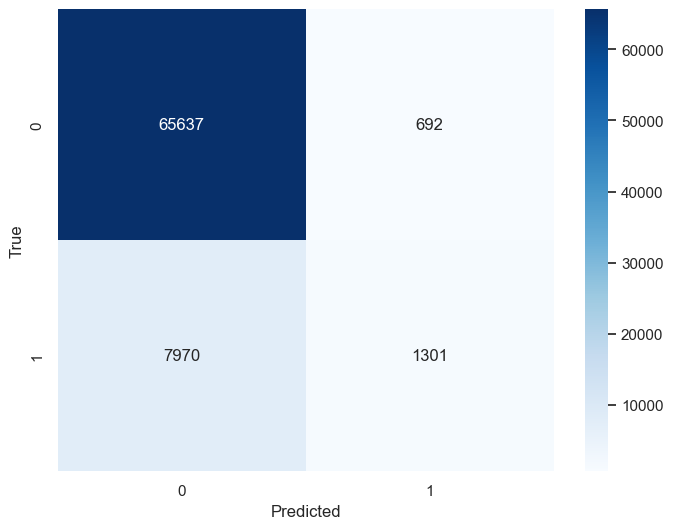

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix

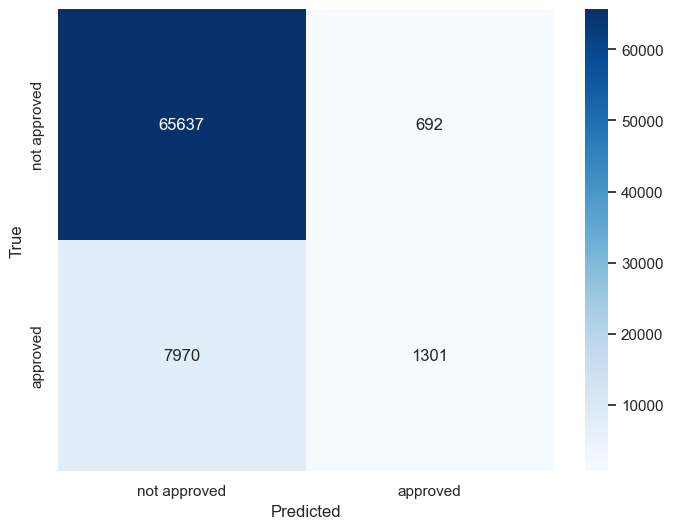

In [44]:
# Get the predicted labels
y_pred = XGB.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['not approved', 'approved'], yticklabels=['not approved', 'approved'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [46]:
from sklearn.metrics import roc_auc_score
print('The accuracy of model is:', roc_auc_score(y_test,y_predict))

The accuracy of model is: 0.5649486095677779


In [47]:
# find the value of ``scale_pos_weight``
scale_pos_weight=len(y[y==0])/len(y[y==1])
scale_pos_weight

7.130081300813008

In [48]:
XGB = XGBClassifier(use_label_encoder=False,scale_pos_weight=7)

# Fitting the model
XGB.fit(X_train, y_train)

# Predicting the model
y_predict = XGB.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
XGB_SC = accuracy_score(y_predict,y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")

C:\Users\Harshit\anaconda3\envs\tensorflow_new\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


              precision    recall  f1-score   support

           0       0.97      0.83      0.90     66329
           1       0.40      0.80      0.54      9271

    accuracy                           0.83     75600
   macro avg       0.68      0.82      0.72     75600
weighted avg       0.90      0.83      0.85     75600

82.96% Accurate


In [49]:
# Priting the confusion matrix
print(confusion_matrix(y_test,y_predict))

[[55306 11023]
 [ 1858  7413]]


In [50]:
# Roc_auc score 
print('The accuracy of model is:', roc_auc_score(y_test,y_predict))

The accuracy of model is: 0.8167016919556359


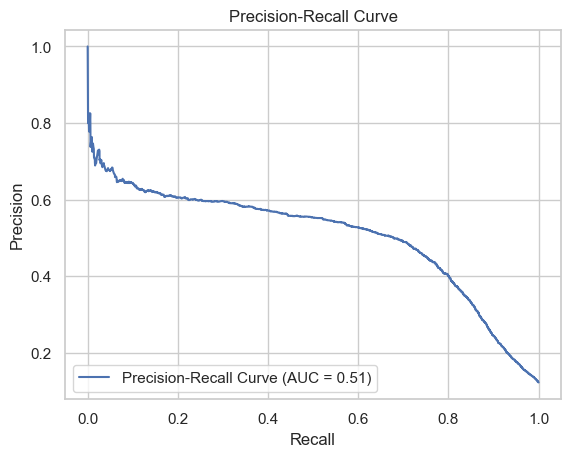

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Get the predicted probabilities of the positive class (class 1)
y_probs = XGB.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Calculate area under the curve (AUC)
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure()
plt.plot(recall, precision, color='b', label=f'Precision-Recall Curve (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()